In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
taxidf = pd.read_csv('D:/project/datasets/taxi trajectory data/train.csv')
taxidf['ID'] = range(0, len(taxidf))

In [4]:
taxidf.count()

TRIP_ID         1710670
CALL_TYPE       1710670
ORIGIN_CALL      364770
ORIGIN_STAND     806579
TAXI_ID         1710670
TIMESTAMP       1710670
DAY_TYPE        1710670
MISSING_DATA    1710670
POLYLINE        1710670
ID              1710670
dtype: int64

In [5]:
taxidf.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,ID
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",0
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",1
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",3
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",4


In [6]:
taxidf.isna().sum()
# we could remove ORIGIN_CALL and ORIGIN_STAND since im not using it this time

TRIP_ID               0
CALL_TYPE             0
ORIGIN_CALL     1345900
ORIGIN_STAND     904091
TAXI_ID               0
TIMESTAMP             0
DAY_TYPE              0
MISSING_DATA          0
POLYLINE              0
ID                    0
dtype: int64

In [7]:
count = taxidf.MISSING_DATA.value_counts()
count

False    1710660
True          10
Name: MISSING_DATA, dtype: int64

In [8]:
count = taxidf.POLYLINE.value_counts()['[]']
count

5901

In [9]:
# remove missing GPS data
taxidf = taxidf[taxidf.MISSING_DATA != True]
# remove empty polyline
taxidf = taxidf[taxidf.POLYLINE != '[]']

In [35]:
data=[]
#sample in the trip loop
for trip in taxidf['POLYLINE'].loc[0:(len(taxidf) * 100) - 1]:
    for longitude, latitude in eval(trip.split()[0]):
        data.append([longitude,latitude])
        
df = pd.DataFrame(data, columns=['longitude', 'latitude'])

In [39]:
df.to_csv('kaggle_taxi_extracted.csv')

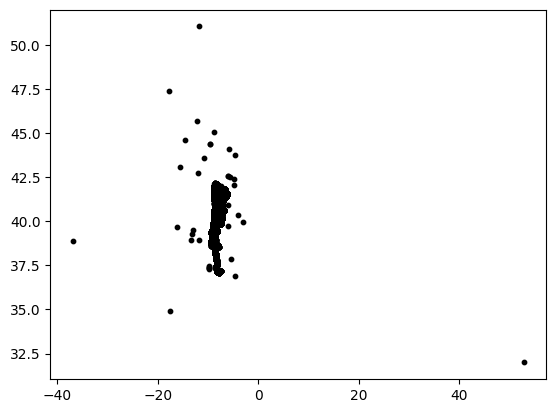

In [38]:
plt.scatter(df['longitude'],df['latitude'],c='black',s=10)
plt.show()

(-8.75, -8.5)

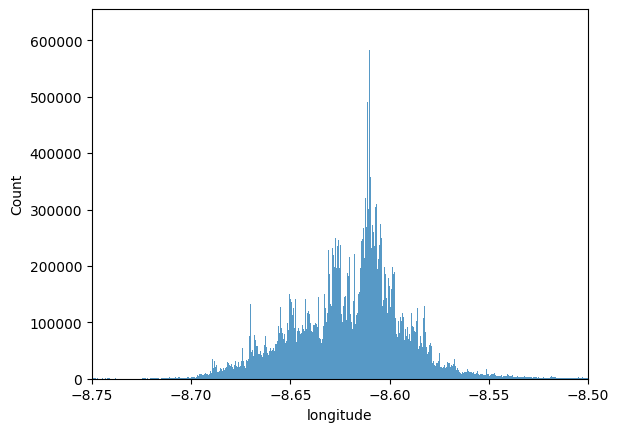

In [4]:
sns.histplot(df['longitude'])
plt.xlim(-8.75, -8.50)

(41.125, 41.2)

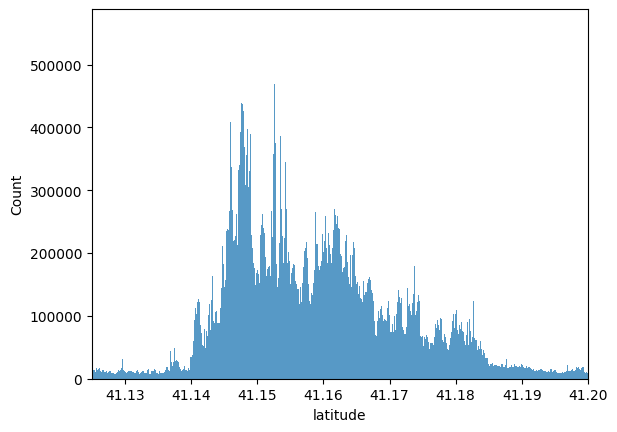

In [8]:
sns.histplot(df['latitude'])
plt.xlim(41.125, 41.2)

In [2]:
df = pd.read_csv('D:/project/datasets/kaggle_taxi_extracted.csv')
df

,Unnamed: 0,longitude,latitude
0,0,-8.618643,41.141412
1,1,-8.618499,41.141376
2,2,-8.620326,41.142510
3,3,-8.622153,41.143815
4,4,-8.623953,41.144373
...,...,...,...
83408412,83408412,-8.620929,41.149854
83408413,83408413,-8.620893,41.149881
83408414,83408414,-8.620893,41.149881
83408415,83408415,-8.620893,41.149881


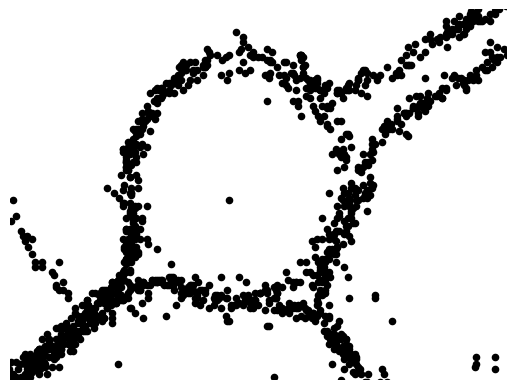

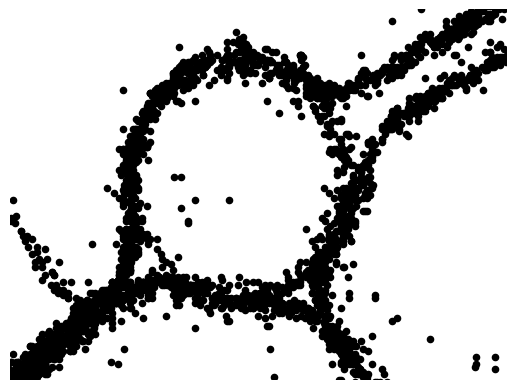

In [58]:
min_longitude = -8.6739
max_longitude = -8.6713
min_latitude = 41.1545
max_latitude = 41.1558

#    
#       
#    
#   
#  

############################################################

for rate in np.arange(0.01, .03, 0.01):
    sampling = len(df) * rate
    plt.scatter(df.loc[0 : sampling, ["longitude"]],
                df.loc[0 : sampling, ["latitude"]], color = 'black', s = 20)
    plt.xlim(min_longitude, max_longitude)
    plt.ylim(min_latitude, max_latitude)
    plt.axis("off")
    plt.show()

In [ ]:
min_longitude = -8.62375 
max_longitude = -8.62210   
min_latitude = 41.17343 
max_latitude = 41.17432

min_longitude = -8.6739
max_longitude = -8.6713
min_latitude = 41.1545
max_latitude = 41.1558

In [ ]:
#3 not round
#5 not round
#6 not round
#8 not round
#9 not round
#10 not round

In [62]:
i = 112

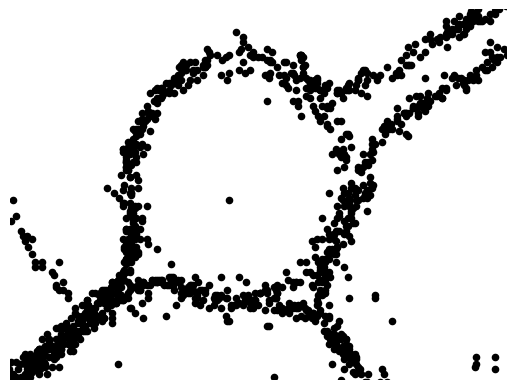

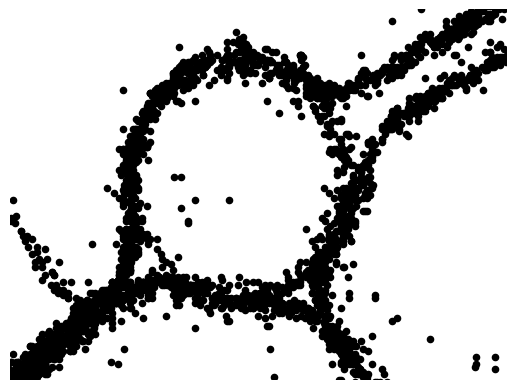

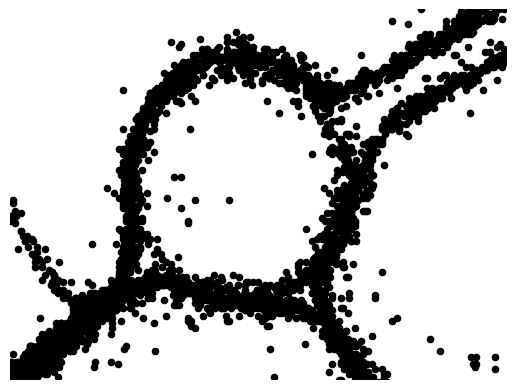

In [63]:
min_longitude = -8.6739
max_longitude = -8.6713
min_latitude = 41.1545
max_latitude = 41.1558

#extra
for rate in np.arange(0.01, .04, 0.01):
    sampling = len(df) * rate
    plt.scatter(df.loc[0 : sampling, ["longitude"]],
                df.loc[0 : sampling, ["latitude"]], color = 'black', s = 20)
    plt.xlim(min_longitude, max_longitude)
    plt.ylim(min_latitude, max_latitude)
    plt.axis("off")
    plt.savefig(f"D:/project/intersections/porto_kaggle/round/{i}.jpg", format = 'jpg')
    i = i + 1
    plt.show()
    
# high density
# for rate in np.arange(0.1, .25, 0.05):
#     sampling = len(df) * rate
#     plt.scatter(df.loc[0 : sampling, ["longitude"]],
#                 df.loc[0 : sampling, ["latitude"]], color = 'black', s = 20)
#     plt.xlim(min_longitude, max_longitude)
#     plt.ylim(min_latitude, max_latitude)
#     plt.axis("off")
#     plt.savefig(f"D:/project/intersections/porto_kaggle/round/{i}.jpg", format = 'jpg')
#     i = i + 1
#     plt.show()

#low density
# for rate in np.arange(0.4, .9, 0.2):
#     sampling = len(df) * rate
#     plt.scatter(df.loc[0 : sampling, ["longitude"]],
#                 df.loc[0 : sampling, ["latitude"]], color = 'black', s = 20)
#     plt.xlim(min_longitude, max_longitude)
#     plt.ylim(min_latitude, max_latitude)
#     plt.axis("off")
#     plt.savefig(f"D:/project/intersections/porto_kaggle/round/{i}.jpg", format = 'jpg')
#     i = i + 1
#     plt.show()

In [ ]:
#5 round
